## Obtendo a Fronteira Eficiente de markowitz

In [19]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [20]:
carteira = ['VULC3.SA','ITUB4.SA', 'KLBN11.SA', 'RAIL3.SA', 'UGPA3.SA', 'ANIM3.SA', 'MLAS3.SA', 'POMO4.SA', 'MEAL3.SA', 'GMAT3.SA', 'MYPK3.SA',]
mdata = pd.DataFrame()
for t in carteira:
    mdata[t] = yf.download(t,data_source='yahoo',start='2020-1-1', end = '2022-09-19')['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
wights = np.array([0.2701, 0.1804, 0.1411, 0.1319, 0.1101, 0.0888, 0.0449, 0.0134, 0.0082, 0.0072, 0.0039])                                                          


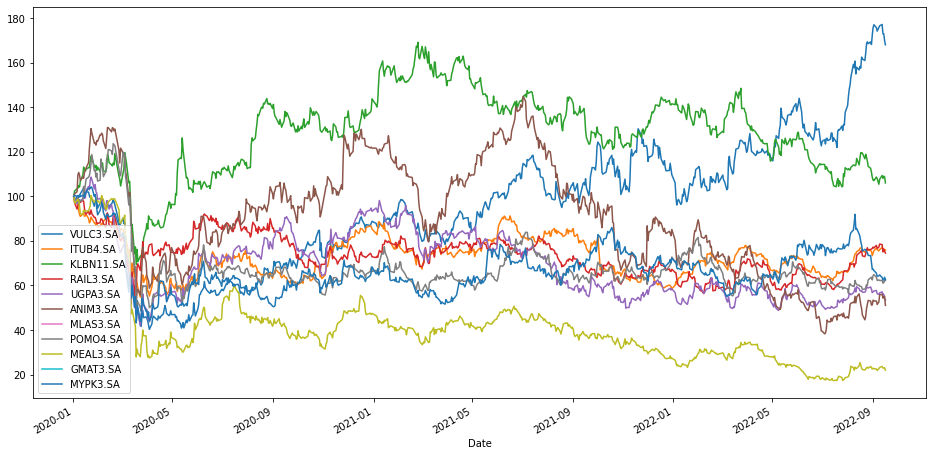

In [22]:
(mdata / mdata.iloc[0] * 100).plot(figsize = (16,8));

In [23]:
df_log= np.log(mdata / mdata.shift(1))
print(df_log.head())

            VULC3.SA  ITUB4.SA  KLBN11.SA  RAIL3.SA  UGPA3.SA  ANIM3.SA  \
Date                                                                      
2020-01-02       NaN       NaN        NaN       NaN       NaN       NaN   
2020-01-03 -0.019070 -0.010573   0.024046 -0.029600 -0.011788  0.011755   
2020-01-06  0.016845 -0.014994   0.008936 -0.028896 -0.021979  0.008313   
2020-01-07  0.001113 -0.023472   0.003135  0.014750  0.021979  0.071550   
2020-01-08  0.000000 -0.016428   0.010895  0.012974 -0.007936  0.010121   

            MLAS3.SA  POMO4.SA  MEAL3.SA  GMAT3.SA  MYPK3.SA  
Date                                                          
2020-01-02       NaN       NaN       NaN       NaN       NaN  
2020-01-03       NaN -0.006644 -0.030913       NaN  0.004633  
2020-01-06       NaN -0.013423  0.011561       NaN -0.004633  
2020-01-07       NaN  0.013423  0.005731       NaN  0.003371  
2020-01-08       NaN -0.027029 -0.005731       NaN -0.008025  


In [24]:
df_log.mean()*250

VULC3.SA     0.192707
ITUB4.SA    -0.102293
KLBN11.SA    0.021653
RAIL3.SA    -0.109095
UGPA3.SA    -0.232449
ANIM3.SA    -0.249538
MLAS3.SA    -0.665303
POMO4.SA    -0.176042
MEAL3.SA    -0.562721
GMAT3.SA    -0.139271
MYPK3.SA    -0.173305
dtype: float64

In [25]:
df_log.cov()*250

,VULC3.SA,ITUB4.SA,KLBN11.SA,RAIL3.SA,UGPA3.SA,ANIM3.SA,MLAS3.SA,POMO4.SA,MEAL3.SA,GMAT3.SA,MYPK3.SA
VULC3.SA,0.231007,0.081080,0.044193,0.097949,0.142811,0.139445,0.103206,0.130809,0.167966,0.056961,0.126536
ITUB4.SA,0.081080,0.147296,0.026451,0.079931,0.122918,0.085278,0.039420,0.089865,0.109322,0.026551,0.089771
KLBN11.SA,0.044193,0.026451,0.135359,0.056806,0.061299,0.047220,0.023608,0.051931,0.061185,0.014165,0.047770
RAIL3.SA,0.097949,0.079931,0.056806,0.198298,0.148095,0.114037,0.074647,0.101092,0.135805,0.044008,0.105221
UGPA3.SA,0.142811,0.122918,0.061299,0.148095,0.305863,0.168752,0.092540,0.154934,0.183728,0.061882,0.153338
ANIM3.SA,0.139445,0.085278,0.047220,0.114037,0.168752,0.358061,0.134453,0.153366,0.221544,0.081975,0.152695
MLAS3.SA,0.103206,0.039420,0.023608,0.074647,0.092540,0.134453,0.383404,0.073426,0.166209,0.107595,0.082646
POMO4.SA,0.130809,0.089865,0.051931,0.101092,0.154934,0.153366,0.073426,0.259687,0.195315,0.053045,0.170095
MEAL3.SA,0.167966,0.109322,0.061185,0.135805,0.183728,0.221544,0.166209,0.195315,0.457661,0.079964,0.193453
GMAT3.SA,0.056961,0.026551,0.014165,0.044008,0.061882,0.081975,0.107595,0.053045,0.079964,0.162671,0.039797


In [26]:
df_log.corr()

,VULC3.SA,ITUB4.SA,KLBN11.SA,RAIL3.SA,UGPA3.SA,ANIM3.SA,MLAS3.SA,POMO4.SA,MEAL3.SA,GMAT3.SA,MYPK3.SA
VULC3.SA,1.000000,0.439546,0.249919,0.457644,0.537260,0.484853,0.400551,0.534073,0.516578,0.355376,0.478721
ITUB4.SA,0.439546,1.000000,0.187326,0.467694,0.579105,0.371333,0.201084,0.459484,0.421057,0.204904,0.425327
KLBN11.SA,0.249919,0.187326,1.000000,0.346730,0.301266,0.214489,0.134885,0.276984,0.245826,0.123628,0.236097
RAIL3.SA,0.457644,0.467694,0.346730,1.000000,0.601335,0.427965,0.365574,0.445485,0.450801,0.318917,0.429662
UGPA3.SA,0.537260,0.579105,0.301266,0.601335,1.000000,0.509927,0.348199,0.549741,0.491065,0.360850,0.504160
ANIM3.SA,0.484853,0.371333,0.214489,0.427965,0.509927,1.000000,0.372821,0.502952,0.547280,0.376524,0.464010
MLAS3.SA,0.400551,0.201084,0.134885,0.365574,0.348199,0.372821,1.000000,0.324375,0.527398,0.393438,0.329448
POMO4.SA,0.534073,0.459484,0.276984,0.445485,0.549741,0.502952,0.324375,1.000000,0.566552,0.353073,0.606943
MEAL3.SA,0.516578,0.421057,0.245826,0.450801,0.491065,0.547280,0.527398,0.566552,1.000000,0.385845,0.519979
GMAT3.SA,0.355376,0.204904,0.123628,0.318917,0.360850,0.376524,0.393438,0.353073,0.385845,1.000000,0.235008


In [27]:
# Contador de ativos
numero_ativos  = len(carteira)
numero_ativos

11

In [28]:
pesos_ativos = np.random.random(numero_ativos)
pesos_ativos /= np.sum(pesos_ativos)
pesos_ativos

array([0.14256999, 0.00320256, 0.17969617, 0.08949432, 0.08636547,
       0.07090427, 0.12554955, 0.07610339, 0.05751424, 0.11383011,
       0.05476992])

In [29]:
pesos_ativos[0]+pesos_ativos[1]

0.14577255515146748

## Expectativa de portifolio: retorno

In [30]:
np.sum(pesos_ativos * df_log.mean())*250 

-0.17113009722176187

## Expectativa de portifolio: Variencia 

In [31]:
np.dot(pesos_ativos.T, np.dot(df_log.cov()*250 , pesos_ativos))

0.10556308918325641

## Expectativa de portifolio: Valotilidade

In [32]:
np.sqrt(np.dot(pesos_ativos.T, np.dot(df_log.cov()*250 , pesos_ativos)))

0.3249047386285039

### simular o portilofio com 1000 possiveis pesos dos ativos, visanto testar qual o pesso mais eficiente para a carteria

In [33]:

retorno_portifolio = []
valatilidade_portifolio = []

for x in range (1000):
    pesos_ativos = np.random.random(numero_ativos)
    pesos_ativos /= np.sum(pesos_ativos)
    retorno_portifolio.append(np.sum(pesos_ativos * df_log.mean()) * 250)
    valatilidade_portifolio.append(np.sqrt(np.dot(pesos_ativos.T,np.dot(df_log.cov() * 250, pesos_ativos))))

In [34]:
retorno_portifolio = []
valatilidade_portifolio = []

for x in range (1000):
    pesos_ativos = np.random.random(numero_ativos)
    pesos_ativos /= np.sum(pesos_ativos)
    retorno_portifolio.append(np.sum(pesos_ativos * df_log.mean()) * 250)
    valatilidade_portifolio.append(np.sqrt(np.dot(pesos_ativos.T,np.dot(df_log.cov() * 250, pesos_ativos))))


retorno_portifolio = np.array(retorno_portifolio)
valatilidade_portifolio = np.array(valatilidade_portifolio)

### Agora vamos plotar um grafico para finalizar e viluzalizar bem a curso de Markowitz

In [35]:
portifolios  = pd.DataFrame({'Retornos':retorno_portifolio,'Volatilidade':valatilidade_portifolio}) 

Text(0, 0.5, 'Expectativa de Retornos')

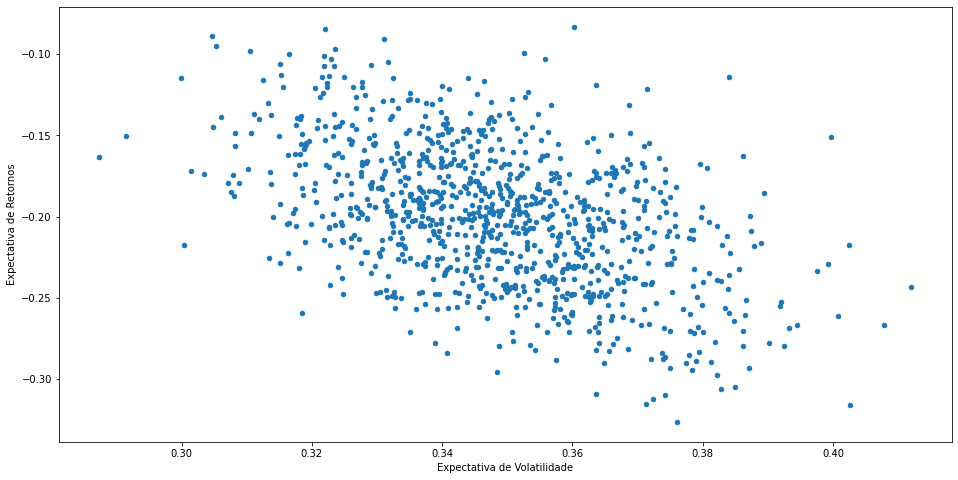

In [36]:
portifolios.plot(x='Volatilidade', y='Retornos', kind='scatter',figsize=(16,8))
plt.xlabel('Expectativa de Volatilidade')
plt.ylabel('Expectativa de Retornos')
